## Team 9 - Cluster Analysis, Text Mining and Ann

### Laura Kay and Austin Nguyen

## Required Dependencies

In [154]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import sklearn.feature_extraction.text as sk_text
vectorizer = sk_text.TfidfVectorizer(min_df=2)
from keras import Sequential
from keras.layers import Dense, Input
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

### Cluster Analysis

In [155]:
import pandas as pd

data = pd.read_csv('./data/imdb_dataset.csv')
data

,Unnamed: 0,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,...,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5,imdb_url,rt_url
0,1,Filly Brown,Feature Film,Drama,80.0,R,Indomina Media Inc.,2013,4,19,...,no,no,Michael D. Olmos,Gina Rodriguez,Jenni Rivera,Lou Diamond Phillips,Emilio Rivera,Joseph Julian Soria,http://www.imdb.com/title/tt1869425/,//www.rottentomatoes.com/m/filly_brown_2012/
1,2,The Dish,Feature Film,Drama,101.0,PG-13,Warner Bros. Pictures,2001,3,14,...,no,no,Rob Sitch,Sam Neill,Kevin Harrington,Patrick Warburton,Tom Long,Genevieve Mooy,http://www.imdb.com/title/tt0205873/,//www.rottentomatoes.com/m/dish/
2,3,Waiting for Guffman,Feature Film,Comedy,84.0,R,Sony Pictures Classics,1996,8,21,...,no,no,Christopher Guest,Christopher Guest,Catherine O'Hara,Parker Posey,Eugene Levy,Bob Balaban,http://www.imdb.com/title/tt0118111/,//www.rottentomatoes.com/m/waiting_for_guffman/
3,4,The Age of Innocence,Feature Film,Drama,139.0,PG,Columbia Pictures,1993,10,1,...,yes,no,Martin Scorsese,Daniel Day-Lewis,Michelle Pfeiffer,Winona Ryder,Richard E. Grant,Alec McCowen,http://www.imdb.com/title/tt0106226/,//www.rottentomatoes.com/m/age_of_innocence/
4,5,Malevolence,Feature Film,Horror,90.0,R,Anchor Bay Entertainment,2004,9,10,...,no,no,Stevan Mena,Samantha Dark,R. Brandon Johnson,Brandon Johnson,Heather Magee,Richard Glover,http://www.imdb.com/title/tt0388230/,//www.rottentomatoes.com/m/10004684-malevolence/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,647,Death Defying Acts,Feature Film,Drama,97.0,PG,Genius Productions,2008,7,11,...,no,no,Gillian Armstrong,Guy Pearce,Catherine Zeta-Jones,Timothy Spall,Saoirse Ronan,Jack Bailey,http://www.imdb.com/title/tt0472071/,//www.rottentomatoes.com/m/death_defying_acts/
647,648,Half Baked,Feature Film,Comedy,82.0,R,Universal Pictures,1998,1,16,...,no,no,Tamra Davis,Dave Chappelle,Guillermo Diaz,Jim Breuer,Harland Williams,Rachel True,http://www.imdb.com/title/tt0120693/,//www.rottentomatoes.com/m/half_baked/
648,649,Dance of the Dead,Feature Film,Action & Adventure,87.0,R,Grindhouse Entertainment,2008,3,9,...,no,no,Gregg Bishop,Jared Kusnitz,Greyson Chadwick,Chandler Darby,Carissa Capobianco,Randy McDowell,http://www.imdb.com/title/tt0926063/,//www.rottentomatoes.com/m/1203339-dance_of_th...
649,650,Around the World in 80 Days,Feature Film,Action & Adventure,120.0,PG,Buena Vista Pictures,2004,6,16,...,no,yes,Frank Coraci,Jackie Chan,Steve Coogan,Ewen Bremner,Robert Fyfe,Ian McNeice,http://www.imdb.com/title/tt0327437/,//www.rottentomatoes.com/m/around_the_world_in...


### KMeans on dataset 

In [156]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


if 'title' in data.columns:
    selected_features = ['title', 'imdb_rating', 'imdb_num_votes', 'critics_score', 'audience_score']

    # Filter data
    selected_data = data[selected_features].copy() 

    # Get ride of rows with missing values 
    selected_data.dropna(inplace=True)

    # Standardize numerical data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numerical_data)

    # Imputation
    imputer = SimpleImputer()
    imputed_data = imputer.fit_transform(scaled_data)

    # KMeans
    k_means = KMeans(n_clusters=2, max_iter=50, random_state=1, n_init=10)
    k_means.fit(imputed_data)
    labels = k_means.labels_
    selected_data['Cluster ID'] = labels

    print(selected_data)

                           title  imdb_rating  imdb_num_votes  critics_score  \
0                    Filly Brown          5.5             899             45   
1                       The Dish          7.3           12285             96   
2            Waiting for Guffman          7.6           22381             91   
3           The Age of Innocence          7.2           35096             80   
4                    Malevolence          5.1            2386             33   
..                           ...          ...             ...            ...   
646           Death Defying Acts          5.9            8345             44   
647                   Half Baked          6.7           46794             29   
648            Dance of the Dead          5.9           10087             80   
649  Around the World in 80 Days          5.8           66054             31   
650                          LOL          4.2           43574             17   

     audience_score  Cluster ID  
0    

In [157]:
centroids = k_means.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=numerical_features)
print(centroids_df)

   imdb_rating  imdb_num_votes  critics_score  audience_score
0     0.712248        0.238242       0.732833        0.760074
1    -0.783473       -0.262066      -0.806116       -0.836082


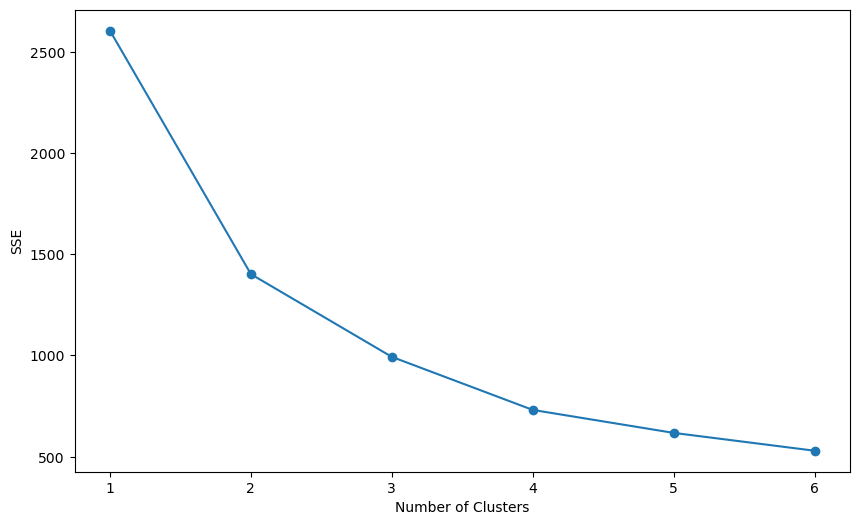

In [158]:
import matplotlib.pyplot as plt

# Compute SSE of different amount clusters
SSE = []
for k in range(1, 7):  
    kmeans = KMeans(n_clusters=k, random_state=1, n_init=10)
    kmeans.fit(imputed_data)
    SSE.append(kmeans.inertia_) 
    
# Plotting SSE vs number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 7), SSE, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.xticks(range(1, 7))
plt.show()


### Heirarchical Clustering 

### Single Link

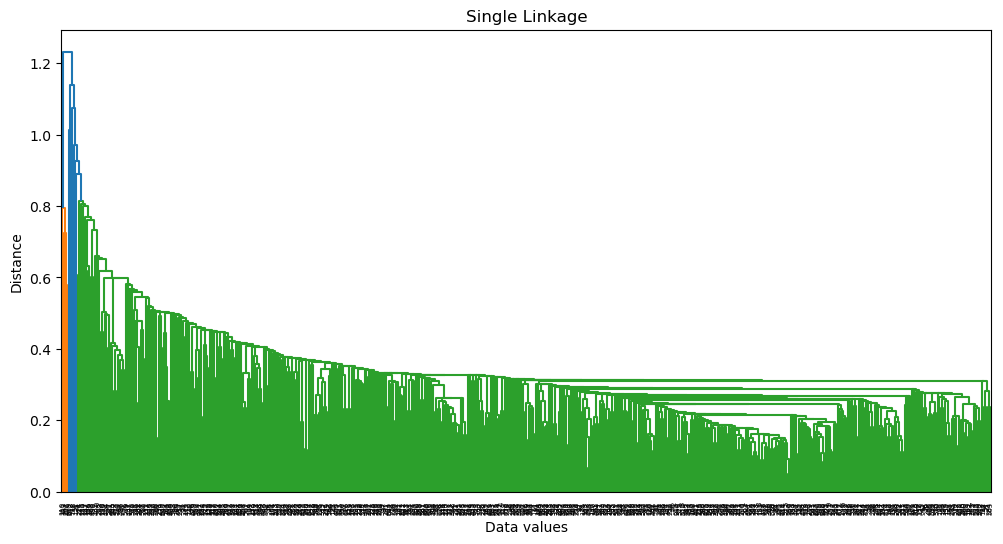

In [159]:
from scipy.cluster.hierarchy import dendrogram, linkage

# hierarchical clustering for single linkage
linkage_single = linkage(imputed_data, method='single')

# Plot single linkage
plt.figure(figsize=(12, 6))
dendrogram(linkage_single)
plt.title('Single Linkage')
plt.xlabel('Data values')
plt.ylabel('Distance')
plt.show()



### Complete linkage

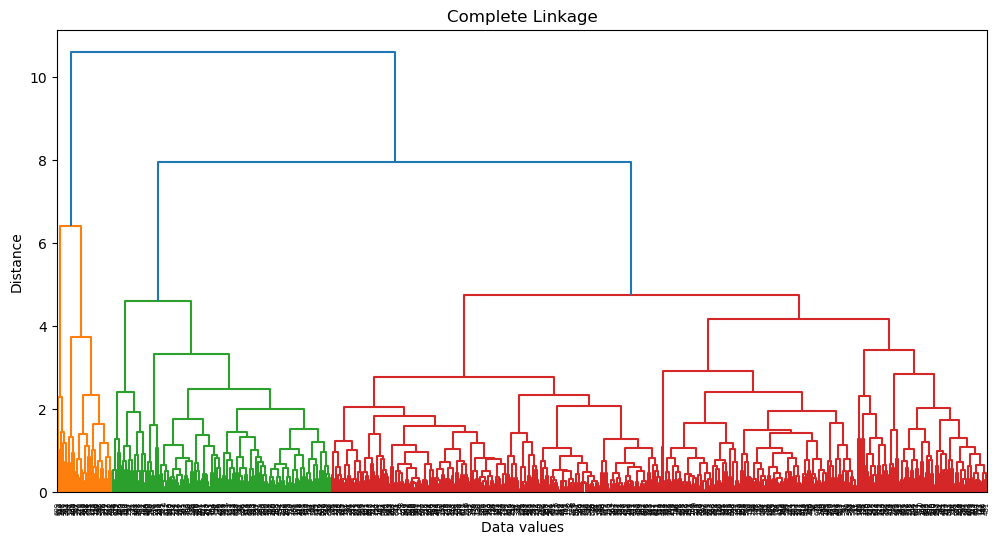

In [160]:
# hierarchical clustering for complete linkage
linkage_complete = linkage(imputed_data, method='complete')

# Plot complete linkage
plt.figure(figsize=(12, 6))
dendrogram(linkage_complete)
plt.title('Complete Linkage')
plt.xlabel('Data values')
plt.ylabel('Distance')
plt.show()

### Average Linkage

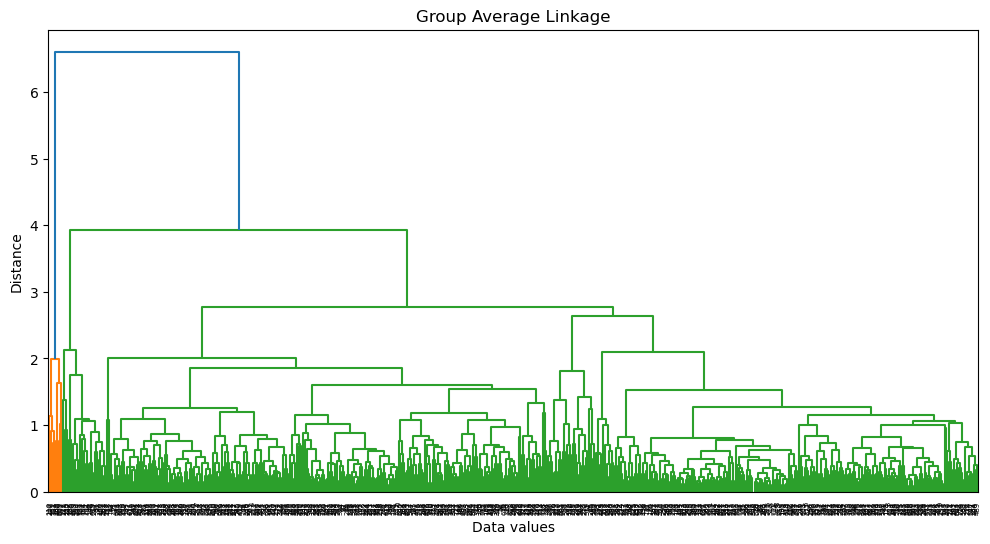

In [161]:
# hierarchical clustering for group average linkage
linkage_group_avg = linkage(imputed_data, method='average')

# Plot group average linkage
plt.figure(figsize=(12, 6))
dendrogram(linkage_group_avg)
plt.title('Group Average Linkage')
plt.xlabel('Data values')
plt.ylabel('Distance')
plt.show()

### Part 2 Text Mining

### Text Processing
This data is the given data according to Assignment4 instructions

In [162]:
data = ['Now for manners use has company believe parlors.',
'Least nor party who wrote while did. Excuse formed as is agreed admire so on result parish.',
'Put use set uncommonly announcing and travelling. Allowance sweetness direction to as necessary.',
'Principle oh explained excellent do my suspected conveying in.',
'Excellent you did therefore perfectly supposing described. ',
'Its had resolving otherwise she contented therefore.',
'Afford relied warmth out sir hearts sister use garden.',
'Men day warmth formed admire former simple.',
'Humanity declared vicinity continue supplied no an. He hastened am no property exercise of. ' ,
'Dissimilar comparison no terminated devonshire no literature on. Say most yet head room such just easy.']

### CountVectorizer

In [163]:
import sklearn.feature_extraction.text as sk_text

vectorizer = sk_text.CountVectorizer(min_df=1)
matrix = vectorizer.fit_transform(data)

print(type(matrix))
print(matrix.toarray())
print(vectorizer.get_feature_names_out())

<class 'scipy.sparse._csr.csr_matrix'>
[[0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
  0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
  0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
  0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0]
 [0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
  0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0
  0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0

### TfIdfVectorizer

In [164]:
vectorizer = sk_text.TfidfVectorizer(min_df=2)

matrix = vectorizer.fit_transform(data)
print(type(matrix))
print(matrix.toarray())
print(vectorizer.get_feature_names_out())

<class 'scipy.sparse._csr.csr_matrix'>
[[0.         0.         0.         0.         0.         0.
  0.         0.         1.         0.        ]
 [0.4472136  0.4472136  0.4472136  0.         0.4472136  0.
  0.4472136  0.         0.         0.        ]
 [0.         0.75262077 0.         0.         0.         0.
  0.         0.         0.65845424 0.        ]
 [0.         0.         0.         1.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.57735027 0.57735027 0.         0.
  0.         0.57735027 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.65845424 0.75262077]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.         0.         0.         0.57735027]
 [0.         0.         0.         0.         0.         1.
  0.         0.         0.         0.        

Usage of Text Mining: Text mining can be used as a tool to analyze large amounts of data. Text mining can be useful for companies to review customer service chats, emails, excel sheets, databases, and even platforms like social media. By using text classification, companies can automate and designate tags on certain words. It can also be done by machine learning systems, as it can learn from previous data and utilize training data for tagging words or text. This can be useful since trained models can help machine learning make predictions in new data. 


### Part 3 ANN

In [193]:
from keras import Sequential
from keras.layers import Dense, Input
import numpy as np
from sklearn import preprocessing

In [194]:
# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_

# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
import collections
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type if isinstance(target_type, collections.abc.Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

In [195]:
data_df = pd.read_csv('data/Admission_Predict_Ver1.1_small_data_set_for_Linear_Regression.csv',header='infer')

In [196]:

data_df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [197]:
testData=data_df[0:150]

testData

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
145,146,320,113,2,2.0,2.5,8.64,1,0.81
146,147,315,105,3,2.0,2.5,8.48,0,0.75
147,148,326,114,3,3.0,3.0,9.11,1,0.83
148,149,339,116,4,4.0,3.5,9.80,1,0.96


In [198]:
#encode the target attribute 
encode_text_index(testData,'Research')

/var/folders/3t/c5hyprsd30s06vj55_0vg_x40000gn/T/ipykernel_687/4180048002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[name] = le.fit_transform(df[name])


array([0, 1])

In [199]:
X,Y = to_xy(data_df,'Research')
testX, testY = to_xy(testData,'Research')

In [200]:
print(X.shape)
print(Y.shape)
Y

(500, 8)
(500, 2)


array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.

In [201]:
model = Sequential()
model.add(Input(shape=(X.shape[1],)))  # Input layer
model.add(Dense(12, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.fit(X, Y, verbose=2, epochs=100)

Epoch 1/100
16/16 - 1s - 58ms/step - loss: 76.6298
Epoch 2/100
16/16 - 0s - 3ms/step - loss: 55.5247
Epoch 3/100
16/16 - 0s - 3ms/step - loss: 34.9004
Epoch 4/100
16/16 - 0s - 4ms/step - loss: 16.5092
Epoch 5/100
16/16 - 0s - 3ms/step - loss: 5.6715
Epoch 6/100
16/16 - 0s - 3ms/step - loss: 3.3107
Epoch 7/100
16/16 - 0s - 3ms/step - loss: 2.1741
Epoch 8/100
16/16 - 0s - 3ms/step - loss: 1.8261
Epoch 9/100
16/16 - 0s - 3ms/step - loss: 1.5880
Epoch 10/100
16/16 - 0s - 3ms/step - loss: 1.3753
Epoch 11/100
16/16 - 0s - 2ms/step - loss: 1.2352
Epoch 12/100
16/16 - 0s - 2ms/step - loss: 1.1057
Epoch 13/100
16/16 - 0s - 2ms/step - loss: 0.9996
Epoch 14/100
16/16 - 0s - 3ms/step - loss: 0.9159
Epoch 15/100
16/16 - 0s - 3ms/step - loss: 0.8497
Epoch 16/100
16/16 - 0s - 3ms/step - loss: 0.8219
Epoch 17/100
16/16 - 0s - 3ms/step - loss: 0.7495
Epoch 18/100
16/16 - 0s - 3ms/step - loss: 0.7365
Epoch 19/100
16/16 - 0s - 3ms/step - loss: 0.7278
Epoch 20/100
16/16 - 0s - 2ms/step - loss: 0.7161
Epoc

In [202]:
pred = model.predict(testX)
print(pred[0])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[0.14227076 0.8577292 ]


In [203]:
pred = np.argmax(pred, axis=1)

In [204]:
true = np.argmax(testY, axis=1)

In [205]:
from sklearn.metrics import accuracy_score
print('Accuracy on test data is %.2f' % (accuracy_score(true, pred)))

Accuracy on test data is 0.56


In [206]:
from sklearn.metrics import classification_report

print(classification_report(true,pred))

              precision    recall  f1-score   support

           0       0.44      0.55      0.49        58
           1       0.67      0.57      0.61        92

    accuracy                           0.56       150
   macro avg       0.56      0.56      0.55       150
weighted avg       0.58      0.56      0.57       150

